In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
file = "D:\codes_python\sds project\games_cleaned.csv"
games = pd.read_csv(file)

In [2]:
games.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [3]:
games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,"['d4', 'Nf6', 'c4', 'c6', 'd5', 'e6', 'Nc3', '...",A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,"['Nf3', 'c5', 'd4', 'cxd4', 'Nxd4', 'd5', 'g3'...",A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,"['e4', 'd5']",B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,"['e4', 'e5', 'Bc4', 'c6', 'Qh5', 'd5', 'exd5',...",C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,"['e4', 'Nc6', 'd4', 'd5', 'e5', 'Qd7', 'Be2', ...",B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,"['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Bxc6'...",C68,Ruy Lopez: Exchange Variation,7.0,181.858500
9363,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,"['e4', 'c5', 'd4', 'cxd4', 'Qxd4', 'Nc6', 'Qe3...",B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
9364,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,"['f4', 'f6', 'e3', 'e5', 'fxe5', 'fxe5', 'Qh5+...",A02,Bird Opening,1.0,157.164167
9365,ayNGChBy,1.0,79.0,resign,black,10+0,dastan-2009,1593.0,summu,1885.0,"['e4', 'c5', 'Nf3', 'd6', 'd4', 'cxd4', 'Nxd4'...",B90,Sicilian Defense: Najdorf Variation | English...,11.0,86.955000


In [4]:
games.isnull().sum()

id                 0
rated              0
turns              0
victory_status    18
winner            20
increment_code     0
white_id           0
white_rating       0
black_id           0
black_rating       0
moves             28
opening_eco       28
opening_name       0
opening_ply        0
game_time          0
dtype: int64

In [5]:
games.describe()

,rated,turns,white_rating,black_rating,opening_ply,game_time
count,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000
mean,0.812960,61.232518,1619.026660,1610.368990,4.943098,155.999684
std,0.389964,34.057891,289.371293,287.405987,2.921981,1076.096438
min,0.000000,1.000000,784.000000,789.000000,1.000000,0.320333
25%,1.000000,38.000000,1426.000000,1422.000000,3.000000,63.284750
50%,1.000000,56.000000,1595.000000,1587.000000,4.000000,109.546667
75%,1.000000,80.000000,1809.000000,1802.000000,6.000000,168.883583
max,1.000000,349.000000,2700.000000,2621.000000,28.000000,100974.116833


In [6]:
games["turns"].describe()

count    9367.000000
mean       61.232518
std        34.057891
min         1.000000
25%        38.000000
50%        56.000000
75%        80.000000
max       349.000000
Name: turns, dtype: float64

In [7]:
stats.iqr(games["turns"])

42.0

In [8]:
new_games = games.copy()

In [9]:
new_games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,"['d4', 'Nf6', 'c4', 'c6', 'd5', 'e6', 'Nc3', '...",A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,"['Nf3', 'c5', 'd4', 'cxd4', 'Nxd4', 'd5', 'g3'...",A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,"['e4', 'd5']",B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,"['e4', 'e5', 'Bc4', 'c6', 'Qh5', 'd5', 'exd5',...",C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,"['e4', 'Nc6', 'd4', 'd5', 'e5', 'Qd7', 'Be2', ...",B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,"['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Bxc6'...",C68,Ruy Lopez: Exchange Variation,7.0,181.858500
9363,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,"['e4', 'c5', 'd4', 'cxd4', 'Qxd4', 'Nc6', 'Qe3...",B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
9364,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,"['f4', 'f6', 'e3', 'e5', 'fxe5', 'fxe5', 'Qh5+...",A02,Bird Opening,1.0,157.164167
9365,ayNGChBy,1.0,79.0,resign,black,10+0,dastan-2009,1593.0,summu,1885.0,"['e4', 'c5', 'Nf3', 'd6', 'd4', 'cxd4', 'Nxd4'...",B90,Sicilian Defense: Najdorf Variation | English...,11.0,86.955000


In [10]:
info = dict(new_games["game_time"].describe())
iqr = info["75%"] - info["25%"] 
info
    

{'count': 9367.0,
 'mean': 155.99968431728414,
 'std': 1076.096437598117,
 'min': 0.32033333333333336,
 '25%': 63.28475,
 '50%': 109.54666666666668,
 '75%': 168.88358333333332,
 'max': 100974.11683333332}

In [11]:
for i in range(len(new_games["game_time"])):
    if not(info["25%"] - 1.5 * iqr <= new_games["game_time"].iloc[i] <= info["75%"] + 1.5 * iqr):
        new_games["game_time"].iloc[i] = None

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
new_games["game_time"].value_counts()

109.546667    29
127.264000     3
22.369667      3
41.634000      3
191.003333     3
              ..
27.328167      1
105.187333     1
26.500333      1
145.136333     1
8.000000       1
Name: game_time, Length: 8445, dtype: int64

In [13]:
info = dict(new_games["opening_ply"].describe())
iqr = info["75%"] - info["25%"] 
for i in range(len(new_games["opening_ply"])):
    if not(info["25%"] - 1.5 * iqr <= new_games["opening_ply"].iloc[i] <= info["75%"] + 1.5 * iqr):
        new_games["opening_ply"].iloc[i] = None

In [14]:
new_games["opening_ply"].value_counts()

3.0     1519
4.0     1484
2.0     1337
5.0     1283
6.0      938
7.0      677
8.0      557
1.0      537
9.0      343
10.0     207
Name: opening_ply, dtype: int64

In [15]:
info = dict(new_games["black_rating"].describe())
iqr = info["75%"] - info["25%"] 
for i in range(len(new_games["black_rating"])):
    if not(info["25%"] - 1.5 * iqr <= new_games["black_rating"].iloc[i] <= info["75%"] + 1.5 * iqr):
        new_games["black_rating"].iloc[i] = None

In [16]:
new_games["black_rating"].value_counts()

1500.00000    378
1562.00000     35
1400.00000     33
1810.00000     29
1610.36899     28
             ... 
925.00000       1
2247.00000      1
875.00000       1
2263.00000      1
944.00000       1
Name: black_rating, Length: 1326, dtype: int64

In [17]:
info = dict(new_games["white_rating"].describe())
iqr = info["75%"] - info["25%"] 
for i in range(len(new_games["white_rating"])):
    if not(info["25%"] - 1.5 * iqr <= new_games["white_rating"].iloc[i] <= info["75%"] + 1.5 * iqr):
        new_games["white_rating"].iloc[i] = None

In [18]:
new_games["white_rating"].value_counts()

1500.00000    327
1536.00000     32
1708.00000     29
1619.02666     27
1621.00000     27
             ... 
2160.00000      1
1056.00000      1
869.00000       1
2361.00000      1
860.00000       1
Name: white_rating, Length: 1313, dtype: int64

In [19]:
info = dict(new_games["turns"].describe())
iqr = info["75%"] - info["25%"] 
for i in range(len(new_games["turns"])):
    if not(info["25%"] - 1.5 * iqr <= new_games["turns"].iloc[i] <= info["75%"] + 1.5 * iqr):
        new_games["turns"].iloc[i] = None

In [20]:
new_games["turns"].value_counts()

53.0     154
55.0     146
57.0     144
45.0     143
52.0     141
        ... 
133.0     10
141.0      7
140.0      7
1.0        6
143.0      6
Name: turns, Length: 143, dtype: int64

In [21]:
new_games = new_games.dropna()

In [22]:
new_games

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_time
0,fyfWyjj2,1.0,56.0,resign,black,10+6,mindworm,2180.0,lolmens,2134.0,"['d4', 'Nf6', 'c4', 'c6', 'd5', 'e6', 'Nc3', '...",A50,Slav Indian,4.0,152.045167
1,QmCyfnNZ,1.0,55.0,resign,white,10+0,philipp_0x,1291.0,alywezza,1326.0,"['Nf3', 'c5', 'd4', 'cxd4', 'Nxd4', 'd5', 'g3'...",A04,Zukertort Opening: Sicilian Invitation,2.0,137.408000
2,X1hUH5gY,1.0,2.0,resign,white,180+180,chiggen,1291.0,drakon1,965.0,"['e4', 'd5']",B01,Scandinavian Defense,2.0,0.929667
3,xfD25ZBl,1.0,111.0,resign,white,9+5,khelil,1611.0,gleb763,1418.0,"['e4', 'e5', 'Bc4', 'c6', 'Qh5', 'd5', 'exd5',...",C23,Bishop's Opening: Philidor Counterattack,4.0,169.290000
4,BFo44qd4,1.0,25.0,mate,white,10+0,elvis1997,2168.0,kabuto87,1650.0,"['e4', 'Nc6', 'd4', 'd5', 'e5', 'Qd7', 'Be2', ...",B00,Nimzowitsch Defense: Scandinavian Variation | ...,5.0,49.667500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,SVScVlox,1.0,53.0,mate,white,30+0,hamed5058,1709.0,jat,1442.0,"['e4', 'd5', 'exd5', 'c6', 'd4', 'cxd5', 'Nc3'...",B13,Caro-Kann Defense: Exchange Variation,5.0,158.018833
9362,eBZNlH7w,1.0,55.0,resign,black,20+0,sdmabunda,1518.0,rehcsif6rehcsif,1546.0,"['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'a6', 'Bxc6'...",C68,Ruy Lopez: Exchange Variation,7.0,181.858500
9363,MtDU2OuN,1.0,30.0,mate,black,20+5,aradov,1060.0,rodrigowski19,1202.0,"['e4', 'c5', 'd4', 'cxd4', 'Qxd4', 'Nc6', 'Qe3...",B21,Sicilian Defense: Smith-Morra Gambit #2,3.0,32.038167
9364,wL5yxYVK,1.0,61.0,resign,white,15+15,azomio,1410.0,karanlikyol,1355.0,"['f4', 'f6', 'e3', 'e5', 'fxe5', 'fxe5', 'Qh5+...",A02,Bird Opening,1.0,157.164167


{'whiskers': [<matplotlib.lines.Line2D at 0x21a3ae4ddc8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3ae4df88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3ae4d548>],
 'medians': [<matplotlib.lines.Line2D at 0x21a3ae57c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a3ae5dcc8>],
 'means': []}

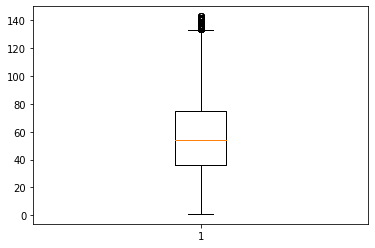

In [23]:
plt.boxplot(new_games["turns"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3ade6e48>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3ad8b2c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3adc28c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21a3983b088>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a3ad61488>],
 'means': []}

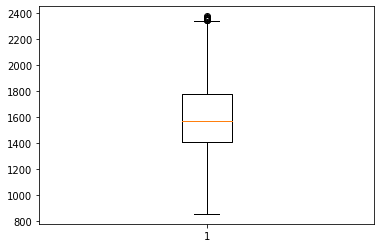

In [24]:
plt.boxplot(new_games["white_rating"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3af55c88>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3af58c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3af552c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21a3af5dbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a3af5dd08>],
 'means': []}

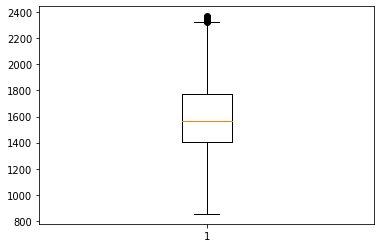

In [25]:
plt.boxplot(new_games["black_rating"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3afc9cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3afcec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3afc9308>],
 'medians': [<matplotlib.lines.Line2D at 0x21a3afd2c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a3afd2d48>],
 'means': []}

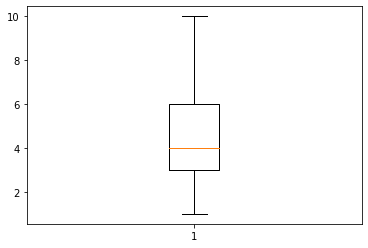

In [26]:
plt.boxplot(new_games["opening_ply"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3b02eb08>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3b032ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3b02e148>],
 'medians': [<matplotlib.lines.Line2D at 0x21a3b036a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a3b036b88>],
 'means': []}

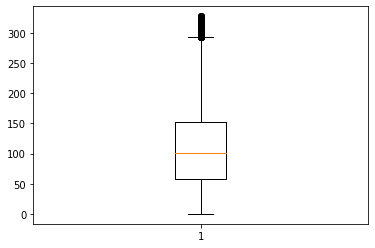

In [27]:
plt.boxplot(new_games["game_time"])

In [28]:
new_games.to_csv("games_cleaned_withoutOutliers.csv")

In [29]:
print(len(new_games["id"]))

8007
